### Instrucciones generales <a class="tocSkip"></a>
1. Forme un grupo de **máximo dos estudiantes**
1. Copie este notebook y **modifique el nombre de archivo** agregando los apellidos de ambos miembros. Por ejemplo si los miembros del grupo son Pablo Huijse y Ana Nuñez el nombre sería: `info147_tarea1_huijse_nuñez.ipynb`
1. Versione su trabajo usando un **repositorio privado de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña Puede agregar a su compañero en la pestaña *Settings/Manage access*
1. Sean leales y honestos, no copie los resultados de otros grupos, el único afectado es usted
1. Entregue el notebook con sus respuestas antes del plazo final al correo: phuijse@inf.uach.cl

# Tarea 1: Explorando datos mundiales de COVID-19 <a class="tocSkip"></a>

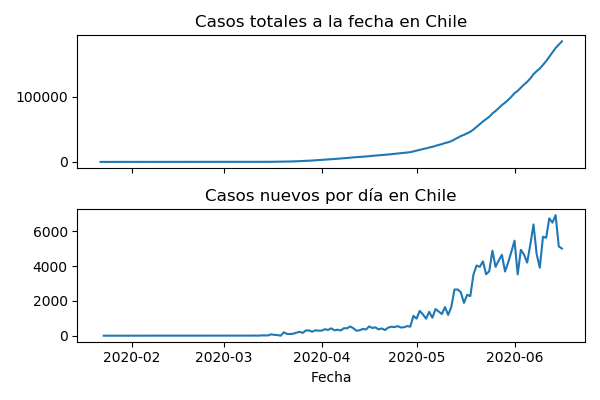


En esta actividad exploraremos la [base de datos de COVID-19 mantenida por la universidad John Hopkins](https://github.com/CSSEGISandData/COVID-19)

Utilice la versión con datos al 16 de Junio que se encuentra adjunto a este notebook en el archivo `data.zip`

Luego de descomprimir deberían observar cuatro archivos

Cada fila de estos archivos corresponde a un país y una región en particular con su latitud, longitud y una serie de tiempo de:

- `covid19_confirmados.csv` : Número de casos totales reportados como COVID-19 positivos
- `covid19_recuperados.csv` : Número de casos totales reportados como recuperados (podría ser considerablemente al valor real)
- `covid19_muertes.csv` : Número de decesos totales por COVID-19

El cuarto archivo `población_mundial.csv` contiene la población por país al 2020 más otros indicadores



> En cada sección de este cuadernillo encontrará instrucciones y preguntas

> Lea cuidadosamente los enunciados y complete con sus respuestas y resultados

> Escriba las rutinas de Python necesarias para resolver los problemas de cada punto. Use las librerías vistas en el curso, se evaluará el resultado pero también la eficiencia de su solución

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

display("Versión de pandas "+pd.__version__)

'Versión de pandas 1.0.5'

## Preparación de datos (1.5pt)

### Análisis preliminar

Considere el archivo `covid19_confirmados.csv` y conteste

- Use `head` para mostrar las tres primeras filas
- Use `cat` y `wc` para contar el número de filas del archivo
- Responda ¿A que corresponden las filas y columnas?  
- Responda ¿Qué tipo es más adecuado para cada columna?

In [11]:
!head -n 3 covid19_confirmados.csv 

'head' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
!cat covid19_confirmados.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
!cat covid19_confirmados.csv | wc

'cat' is not recognized as an internal or external command,
operable program or batch file.


## ¿A que corresponde las filas y columnas?

Con el uso de los comando bash, hemos concluido  que las filas corresponden a la lista de paises del mundo con contagios de covid-19 y las columnas corresponden a la cantidad de casos confirmados en las Probincias, estado o ciudad y la region(con la latitud y longitud de esta) de cada uno de los paises listados.

## ¿Que tipo es mas adecuado para cada columna?

en las primeras 2 columnas como se trabaja con nombres de ciudad,estados o provincias es mas adecuado trabajar con string, en cambio en la ultima columna (region,lat,long) se podria trabjar con string como con float, para esto se podria usar una clase, que contenga el nombre de la region (string) y la latitud y longitud (float) especifica de donde se encuentra el caso confimado.

### Cree un primer DataFrame a partir de `covid19_confirmados.csv` 

1. Utilize el nombre de pais como índice principal
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para los "nombres de columna" asociados a fechas
1. Reduzca la columna `Province/State`, el DataFrame resultante debe tener los totales a nivel país

### Cree un segundo DataFrame a partir `poblacion_mundial.csv`

1. Utilice el nombre de pais como índice principal
1. Elimina todas las columnas excepto `Population`

### Haga un `merge` de ambos DataFrames
1. Asigne un valor de `Population` a los elementos de primer DataFrame
1. Descarte las filas que no recibieron un valor de población

<h3><center>Para los casos confirmados</center></h3>

In [260]:
#Cree un primer DataFrame a partir de covid19_confirmados.csv
data_covid19_confirmados = pd.read_csv('covid19_confirmados.csv', index_col = 1)
data_covid19_confirmados.drop(data_covid19_confirmados.columns[[1,2]], axis='columns', inplace=True)
data_covid19_confirmados['Province/State'] = data_covid19_confirmados['6/16/20']
data_covid19_confirmados.rename(columns={'Province/State':'Total'}, inplace=True)
#data_covid19_confirmados


In [261]:
#Cree un segundo DataFrame a partir poblacion_mundial.csv
data_poblacion_mundial = pd.read_csv('poblacion_mundial.csv', index_col = 0)
data_poblacion_mundial.drop(data_poblacion_mundial.columns[[1,2,3,4,5,6,7,8,9]], axis='columns', inplace=True)
#data_poblacion_mundial

In [262]:
#Haga un merge de ambos DataFrames

df_covidconf_mundial = pd.merge(data_covid19_confirmados, data_poblacion_mundial, left_on= data_covid19_confirmados.index, right_on=data_poblacion_mundial.index)
df_covidconf_mundial.rename(columns={'key_0':'Country'}, inplace=True)
df_covidconf_mundial.set_index(df_covidconf_mundial.columns[0], inplace=True)
#df_covidconf_mundial


<h3><center>Para los casos Recuperados</center></h3>


In [263]:
# para covid19_recuperados.csv
data_covid19_recuperados = pd.read_csv('covid19_recuperados.csv', index_col = 1)
data_covid19_recuperados.drop(data_covid19_recuperados.columns[[1,2]], axis='columns', inplace=True)
data_covid19_recuperados['Province/State'] = data_covid19_recuperados['6/16/20']
data_covid19_recuperados.rename(columns={'Province/State':'Total'}, inplace=True)
#data_covid19_recuperados

In [32]:
df_covidrecu_mundial = pd.merge(data_covid19_recuperados, data_poblacion_mundial, left_on= data_covid19_recuperados.index, right_on=data_poblacion_mundial.index)
df_covidrecu_mundial.rename(columns={'key_0':'Country'}, inplace=True)
df_covidrecu_mundial.set_index(df_covidrecu_mundial.columns[0], inplace=True)
#df_covidrecu_mundial

<h3><center>Para los casos de Muertes</center></h3>

In [264]:
# para covid19_muertes.csv
data_covid19_muertes = pd.read_csv('covid19_muertes.csv', index_col = 1)
data_covid19_muertes.drop(data_covid19_muertes.columns[[1,2]], axis='columns', inplace=True)
data_covid19_muertes['Province/State'] = data_covid19_muertes['6/16/20']
data_covid19_muertes.rename(columns={'Province/State':'Total'}, inplace=True)
#data_covid19_muertes

In [265]:
df_covidmuerte_mundial = pd.merge(data_covid19_muertes, data_poblacion_mundial, left_on= data_covid19_muertes.index, right_on=data_poblacion_mundial.index)
df_covidmuerte_mundial.rename(columns={'key_0':'Country'}, inplace=True)
df_covidmuerte_mundial.set_index(df_covidmuerte_mundial.columns[0], inplace=True)
#df_covidmuerte_mundial

## Análisis global (2pt)

Calcule la cantidad total mundial a la fecha (16 de Junio) de los casos 
- confirmados
- cerrados: recuperados + decesos
- activos: confirmados - cerrados

 ***Calculo de los casos totales de personas con covid confirmados, recuperadas, muertas**

In [297]:
total_confirmados = df_covidconf_mundial['6/16/20'].sum()
total_recuperados = df_covidrecu_mundial['6/16/20'].sum()
total_muertes = df_covidmuerte_mundial['6/16/20'].sum()


al tener estos valores podemos calculas los casos cerrados y activos

In [298]:
total_cerrados = total_recuperados + total_muertes
total_activos = total_confirmados - total_cerrados
#luego los casos son
print('casos confirmados: ',total_confirmados)
print('casos cerrados: ',total_cerrados)
print('casos activos: ',total_activos)

casos confirmados:  8154452
casos cerrados:  4385993
casos activos:  3768459


En base a estas cantidades calcule el porcentaje de 
- casos activos con respecto al total de confirmados
- decesos con respecto al total de casos cerrados
- recuperados con respecto al total de casos cerrados


In [268]:
#Porcentaje casos activos con respecto al total de confirmados
porcentaje_activos = total_activos/total_confirmados
#Porcentaje decesos con respecto al total de casos cerrados
porcentaje_decesos = total_muertes / total_cerrados 
#Porcentaje recuperados con respecto al total de casos cerrados
porcentaje_recuperados = total_recuperados / total_cerrados
print('porcentaje activos con respecto al total de casos confirmados: ',porcentaje_activos*100)
print('porcentaje decesos con respecto al total de casos cerrados: ',porcentaje_decesos*100)
print('porcentaje recuperados con respecto al total de casos cerrados: ',porcentaje_recuperados*100)

porcentaje activos con respecto al total de casos confirmados:  46.21351624854742
porcentaje decesos con respecto al total de casos cerrados:  10.105784482556174
porcentaje recuperados con respecto al total de casos cerrados:  89.89421551744383


Muestre gráficas a nivel mundial de
- la cantidad de **casos confirmados nuevos** por día
- la cantidad de **recuperados nuevos** por día
- la cantidad de **decesos nuevos** por día

In [292]:
df_covidconf_mundial.columns[-2]

'6/16/20'

<IPython.core.display.Javascript object>


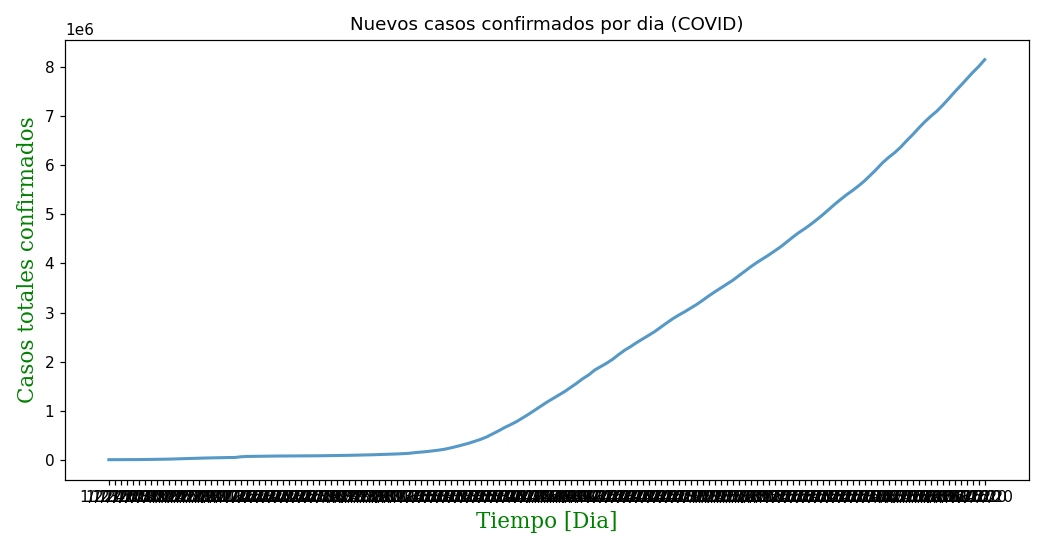

In [294]:
fig, ax = plt.subplots(figsize=(9.5, 5), tight_layout=True, facecolor='w');
ax.plot(df_covidconf_mundial[df_covidconf_mundial.columns[1:-1]].sum() , linewidth=2, alpha=0.75);
ax.set_title('Nuevos casos confirmados por dia (COVID)');
ax.set_xlabel('Tiempo [Dia]', fontsize=14, fontname='serif', color="green");
ax.set_ylabel('Casos totales confirmados', fontsize=14, fontname='serif', color="green");



<IPython.core.display.Javascript object>


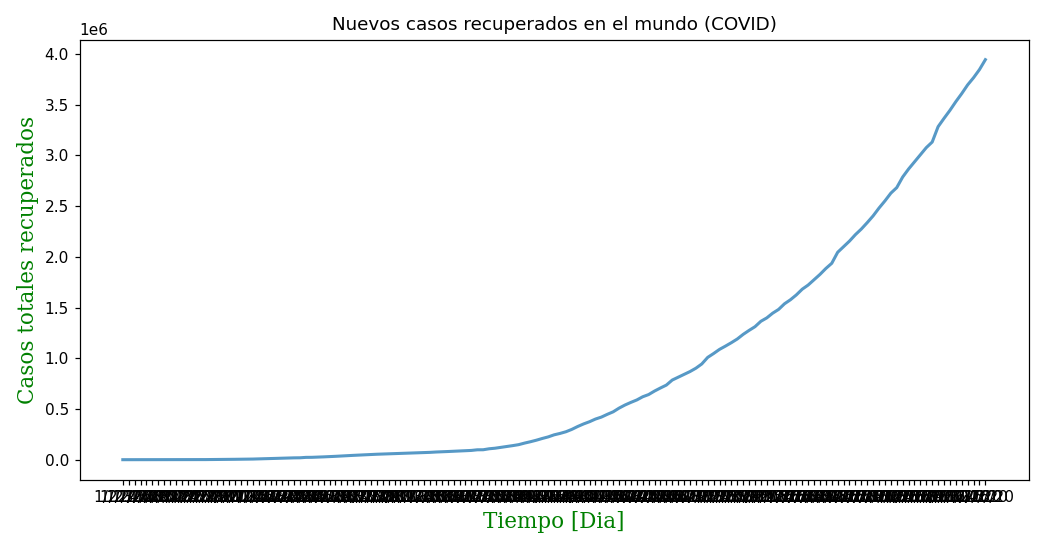

In [284]:
fig, ax = plt.subplots(figsize=(9.5, 5), tight_layout=True, facecolor='w');
ax.plot(df_covidrecu_mundial[df_covidrecu_mundial.columns[1:-1]].sum() , linewidth=2, alpha=0.75);
ax.set_title('Nuevos casos recuperados en el mundo (COVID)');
ax.set_xlabel('Tiempo [Dia]', fontsize=14, fontname='serif', color="green");
ax.set_ylabel('Casos totales recuperados', fontsize=14, fontname='serif', color="green");


<IPython.core.display.Javascript object>


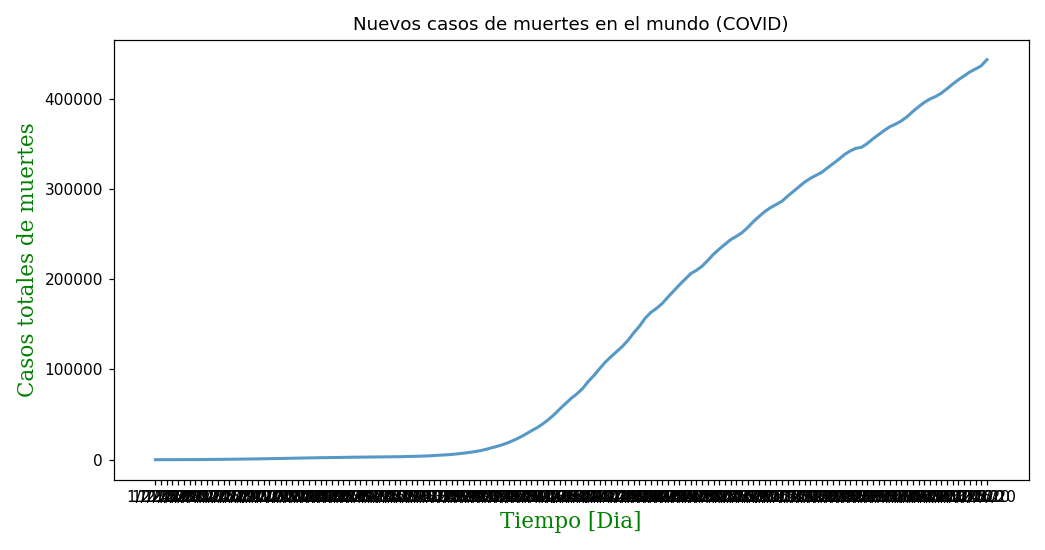

In [254]:
fig, ax = plt.subplots(figsize=(9.5, 5), tight_layout=True, facecolor='w');
ax.plot(df_covidmuerte_mundial[df_covidmuerte_mundial.columns[1:-1]].sum() , linewidth=2, alpha=0.75);
ax.set_title('Nuevos casos de muertes en el mundo (COVID)');
ax.set_xlabel('Tiempo [Dia]', fontsize=14, fontname='serif', color="green");
ax.set_ylabel('Casos totales de muertes', fontsize=14, fontname='serif', color="green");

Encuentre y muestre los nombres y los valores de los 5 paises que a la fecha tienen
- La mayor tasa de incidencia (confirmados por 100.000 dividido población)
- La menor tasa de incidencia 
- La mayor tasa de recuperación (recuperados por 100.000 dividido población)
- La menor tasa de recuperación 
- La mayor tasa de mortalidad (decesos por 100.000 divido población)
- La menor tasa de mortalidad 

¿En qué lugar se encuentra Chile con respecto a cada una de estas métricas? ¿A qué paises se parece más? Discuta y comente sobre sus hallazgos

## Análisis comparativo (2.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib`

- La interfaz debe incluir dos controles para escoger dos paises entre los paises pertenecientes a la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos)
- La interfaz debe mostrar tres gráficos con la evolución temporal de casos confirmados, recuperados y decesos en ambos paises 
- La interfaz debe tener un control que permita escoger entre valores totales acumulados, valores totales diarios y tasas por 100.000 habitantes


En base a su interfaz estudie el caso de Chile contra dos paises de la OCDE seleccionados por usted y comente sobre lo que observa

## BONUS (Opcional)

Implemente una app web a partir de su interfaz desarrollada en el punto anterior en base a jupyter widgets usando [viola](https://github.com/voila-dashboards/voila) y [heroku](https://github.com/voila-dashboards/voila-heroku)

Escriba acá el link a su app web